https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

EDA on the training dataset.                                                                               3/19 - 3/24

Preliminary data cleaning/preprocessing/transformations.                                 3/19 - 3/24


Fit first model using cross validation.                                                                 3/25 - 3/30

Determine which transformations work best.


Fit a second model following the same steps above. 				     3/31 - 4/5

Fit a third model following the same steps above. 				     4/6 - 4/11

Fit last model. 								     4/12 - 4/17

Analyze performance of each model and determine which one works best on the training data. 										     4/18 - 4/23

Use test data on the best model and determine the model’s performance within the competition itself. 								     4/24 -4/28

Final project report 								     4/29 - 5/6


In [35]:
!pip install xgboost scikit-optimize

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV
pd.set_option('display.max_columns', None)


In [37]:
train = pd.read_csv('https://drive.google.com/uc?id=1HSF2ox4KylS7RHMlh0VW_NhCUTPGV6gI')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
train.drop("Id", axis=1, inplace=True)
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Begin EDA and Data Cleaning by indentifing and handling NA values

In [39]:
ser = train.isna().sum().sort_values()
ser[ser > 0]

,0
Electrical,1
MasVnrArea,8
BsmtFinType1,37
BsmtCond,37
BsmtQual,37
BsmtFinType2,38
BsmtExposure,38
GarageType,81
GarageCond,81
GarageFinish,81


# EDA and Summary Statistics

Examine the coorelation between all numeric variables. We can use this to make predictions about which features will be useful as well as to see features that share a lot of information with others. We can use this information for our baseline models and when we are making decisions about the NA values.

We see that OverallQual, TotalBsmtSF, and 1stFlrSF are all highly coorelated to our outcome, SalePrice. We can predict that these features will be important for all our models.

In [40]:
numerical_train = train.select_dtypes(include=['number'])
numerical_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


We have a lot of categorical variables in this dataset that represent rankings of the data. We want to convert them to numerical values before we one-hot encode so that the information contianed in these orderings is preserved.

In [41]:
def numcast(series):
  mapping = {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        np.nan: 0  # Map NaN to 0
    }
  return series.map(mapping).fillna(0).astype(int)  # Fill remaining NaNs with 0 and convert to integers

In [42]:
vars_to_cast = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'PoolQC']
# All ranked variables
for var in vars_to_cast:
  train[var] = numcast(train[var])

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,3,PConc,4,3,No,Unf,0,Unf,0,953,953,GasA,5,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,Typ,1,3,Attchd,1999.0,RFn,2,460,3,3,Y,0,40,0,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,No,ALQ,790,Rec,163,589,1542,GasA,3,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,Min1,2,3,Attchd,1978.0,Unf,2,500,3,3,Y,349,0,0,0,0,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,5,4,Stone,3,4,No,GLQ,275,Unf,0,877,1152,GasA,5,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,4,9,Typ,2,4,Attchd,1941.0,RFn,1,252,3,3,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,CBlock,3,3,Mn,GLQ,49,Rec,1029,0,1078,GasA,4,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,4,5,Typ,0,0,Attchd,1950.0,Unf,1,240,3,3,Y,366,0,112,0,0,0,0,NaN,NaN,0,4,2010,WD,Normal,142125


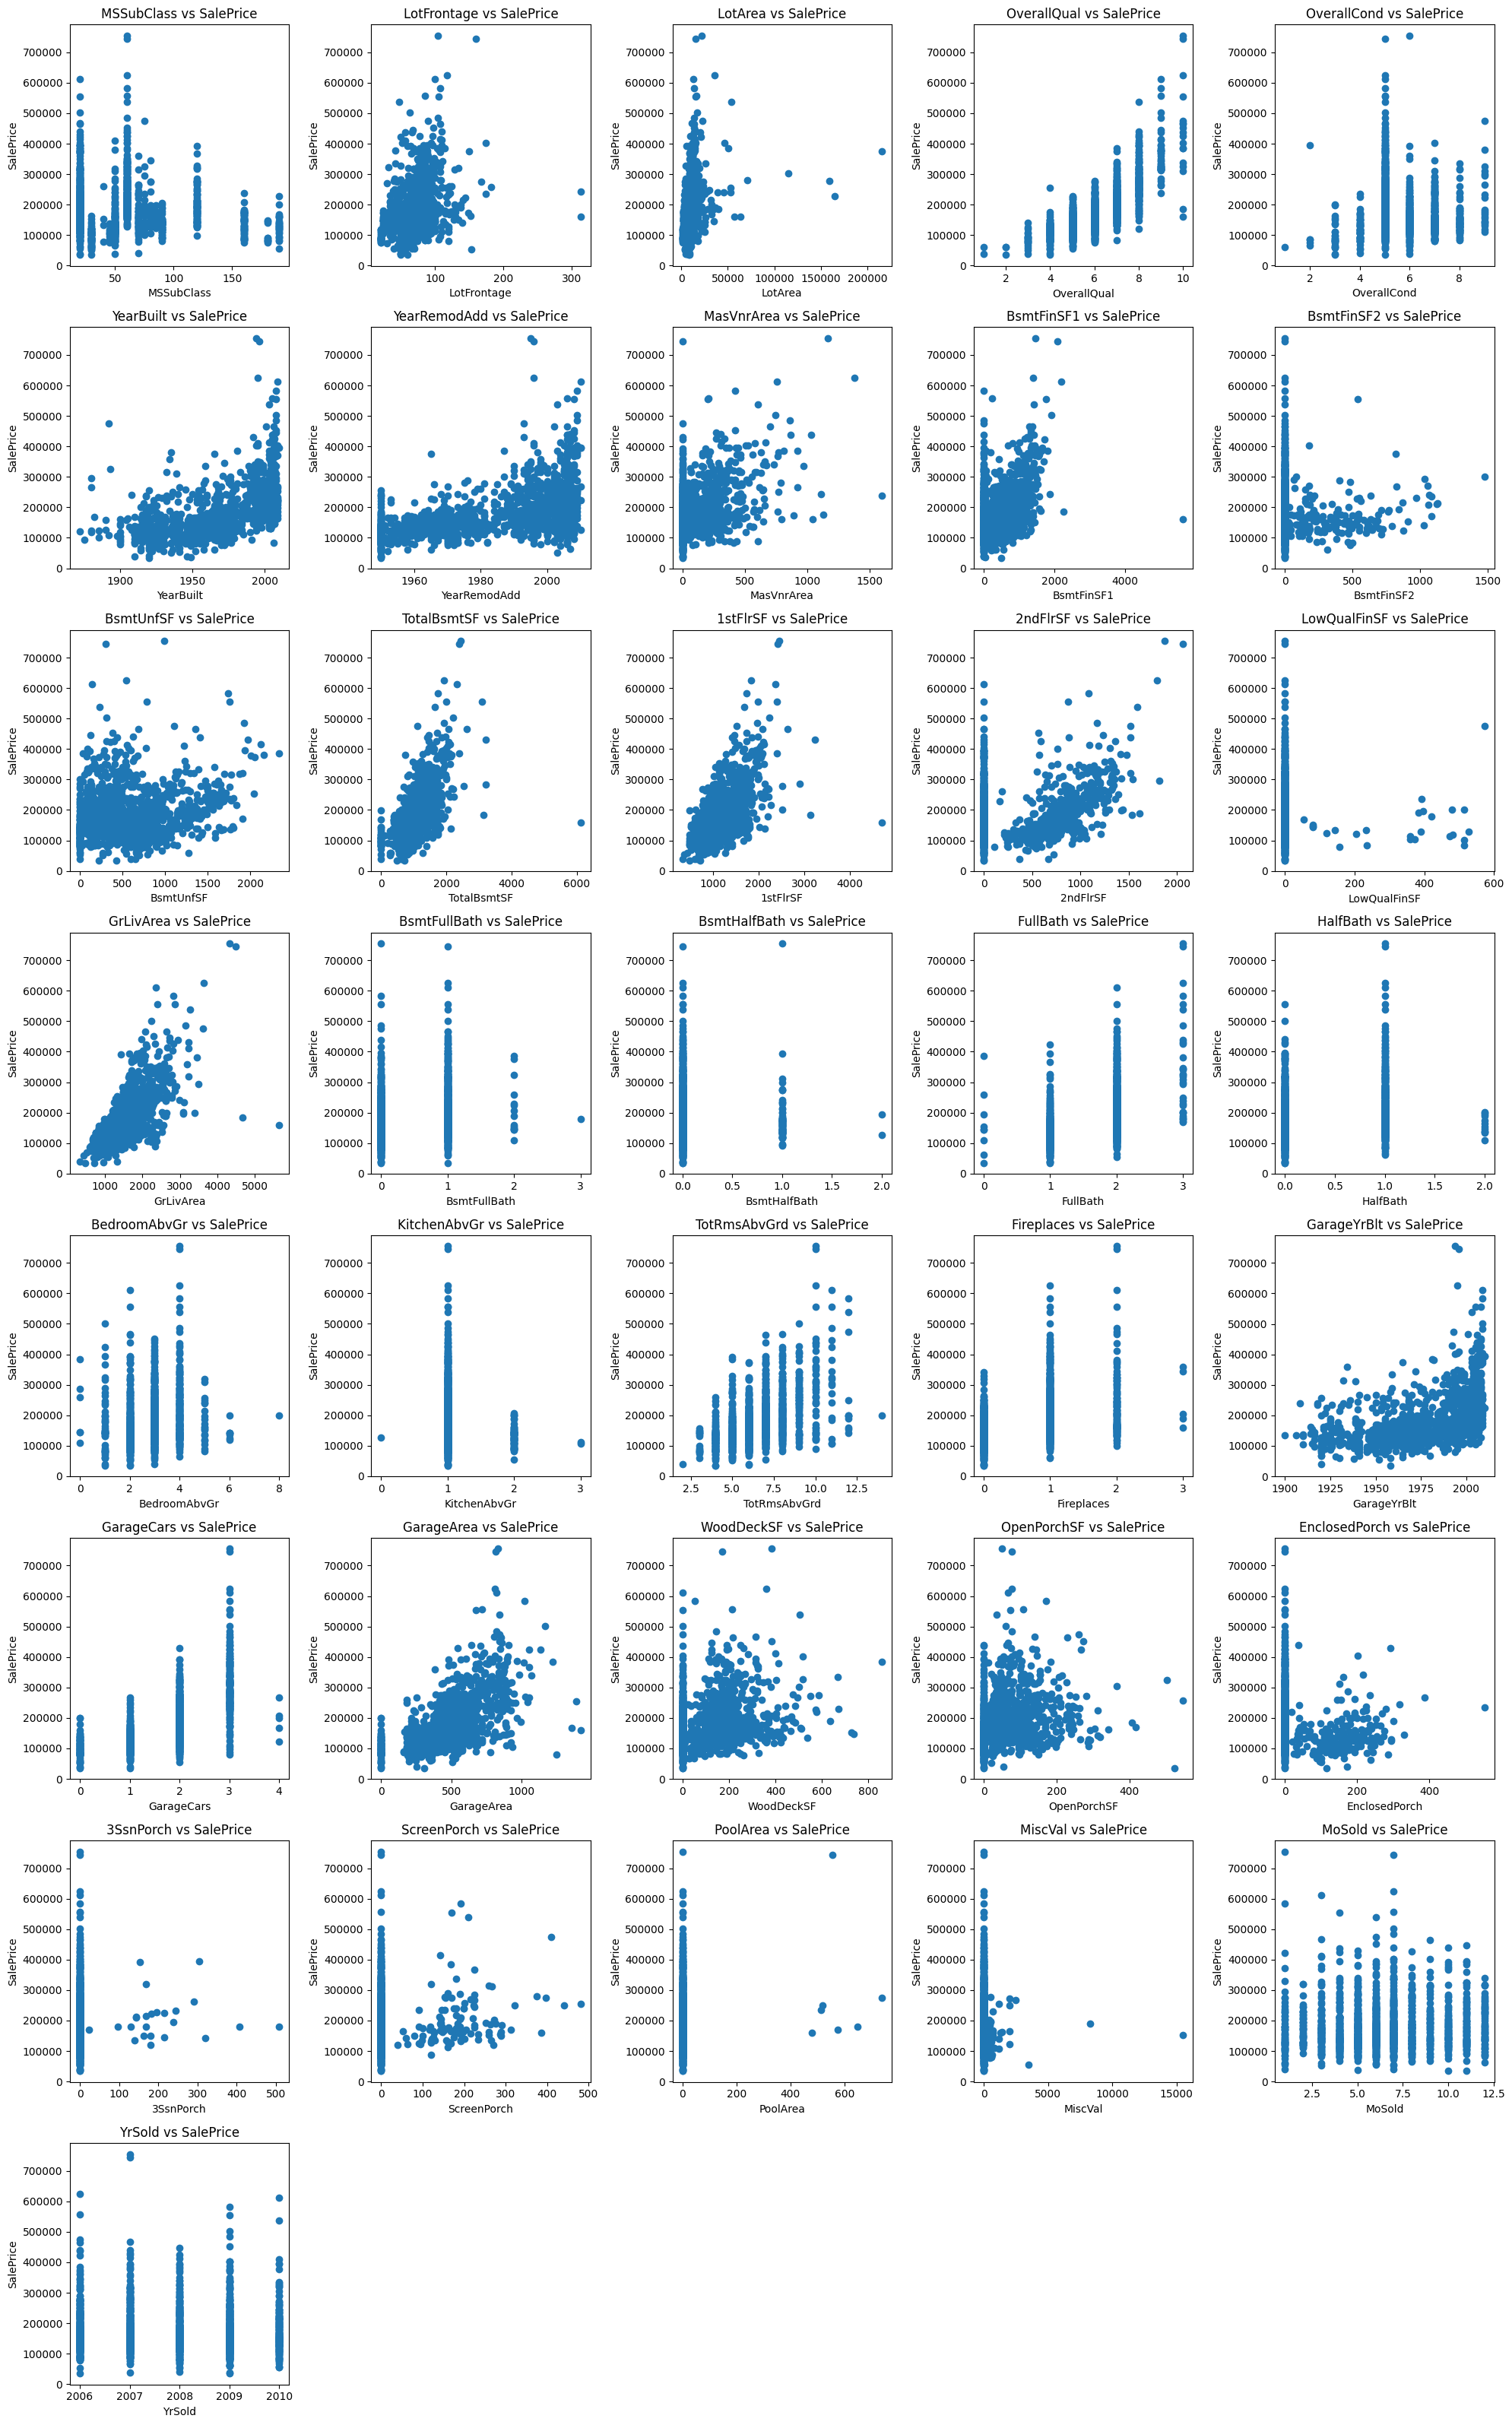

In [43]:
# Scatter plot of each numerical variable against Sale Price
num_cols = len(numerical_train.columns) - 1
cols_per_row = 5
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 4 * num_rows))

for i, col in enumerate(numerical_train.columns):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    axes[row, col_idx].scatter(numerical_train[col], train['SalePrice'])
    axes[row, col_idx].set_title(f'{col} vs SalePrice')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('SalePrice')

# Hide any unused subplots
for i in range(num_cols, num_rows * cols_per_row):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()


Some variables like OverallQual, OverallCond, TotalBstSF, 1stFlrSF, GrLivArea, and TotRmsAbvGrd seems to have a good linear realtionship with the outcome variable. This could indicate that they are good features to include in a linear model or that if we choose to include them in any of our models we would likely not need to apply a kernel function.
YrSold, a categorical variable representing the year a house sold, does not seem as though it will be useful for predicting the sale price of a home because the data points are pretty evenly spread across five groups and there is not much of a distribution in the five groups.

Text(0, 0.5, 'Sale Price')

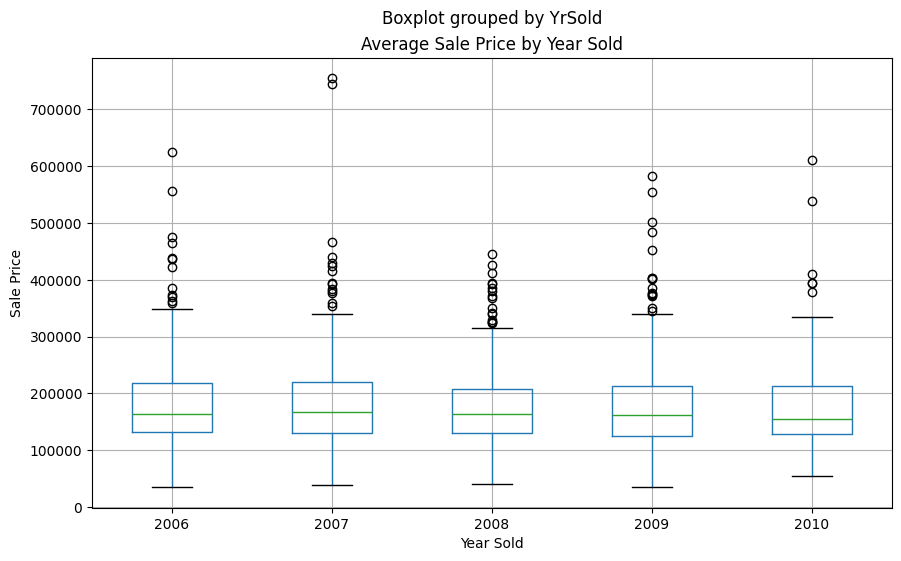

In [44]:
# We can see this more clearly in the boxplots shown below
boxplot = train.boxplot(column='SalePrice', by='YrSold', figsize=(10, 6))
plt.title('Average Sale Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')

When we plot the average sale price against the year, we see that 2008 has the fewest houses sold (except for 2010 the year the data was collected) and almost no high outliers (unlike other years).

We can also see a huge dip in the mean sales price in 2008, which cooresponds with the recession.

Text(0, 0.5, 'Average Sale Price')

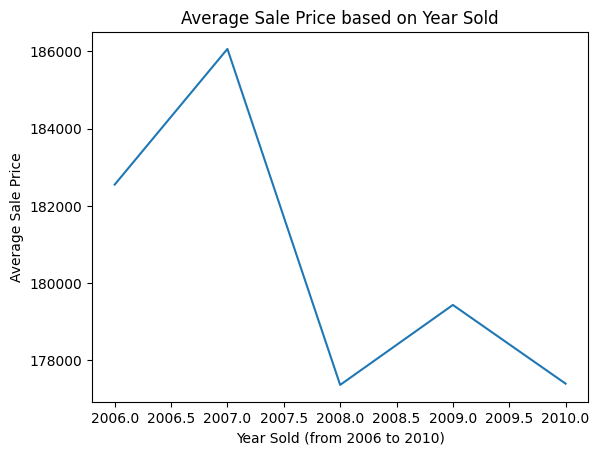

In [45]:
plt.plot(train.groupby('YrSold')['SalePrice'].mean())
plt.title('Average Sale Price based on Year Sold')
plt.xlabel('Year Sold (from 2006 to 2010)')
plt.ylabel('Average Sale Price')

# Handling NA Values

## Electrical cleaning

There was one house that had an NA value for the electrical. This row may need to be imputed or dropped

In [46]:
train[train['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,3,PConc,4,3,No,Unf,0,Unf,0,384,384,GasA,4,Y,NaN,754,640,0,1394,0,0,2,1,3,1,4,7,Typ,0,0,BuiltIn,2007.0,Fin,2,400,3,3,Y,100,0,0,0,0,0,0,NaN,NaN,0,5,2008,WD,Normal,167500


The house seems to be in the 'Timber' neighborhood, and the house seems to be a fully built house otherwise. The condition is normal and the house is rated typically functional, which implies that the electrical data could be missing by mistake.

We will impute the electrical type of the house by taking a majority vote classifier over the electrical types in the neighborhood. When imputing features like electrical that are installed in the house upon construction, we decided to impute based on the neighborhood because it is highly likely that all the homes in any given neighborhood were constructed the same way.

In [47]:
train['Electrical'][train['Neighborhood'] == 'Timber'].value_counts()

,count
Electrical,
SBrkr,36
FuseA,1


In [48]:
# The maximal class is SBrkr, so we will impute using that value
train.loc[1379, 'Electrical'] = 'SBrkr'

## Mason Veneer cleaning

The column 'MasVnrArea' has 8 NA values, but 'MasVnrType' has 872 NA values. It would make sense that these columns have the same number of NA values since they partain to the same part of the house. So, let's determine what's going on here.

In [49]:
train[train['MasVnrType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,3,Wood,4,3,No,GLQ,732,Unf,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,0,Attchd,1993.0,Unf,2,480,3,3,Y,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,3,3,BrkTil,3,3,No,Unf,0,Unf,0,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3,Detchd,1931.0,Unf,2,468,2,3,Y,90,0,205,0,0,0,0,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,BrkTil,3,3,No,GLQ,851,Unf,0,140,991,GasA,5,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,3,5,Typ,2,3,Attchd,1939.0,RFn,1,205,4,3,Y,0,4,0,0,0,0,0,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,4,3,PConc,4,3,No,GLQ,410,Unf,0,811,1221,GasA,5,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,4,6,Typ,0,0,Attchd,2004.0,RFn,2,400,3,3,Y,0,113,0,0,0,0,0,NaN,NaN,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,3,PConc,4,3,No,Unf,0,Unf,0,953,953,GasA,5,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,Typ,1,3,Attchd,1999.0,RFn,2,460,3,3,Y,0,40,0,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,5,4,Stone,3,4,No,GLQ,275,Unf,0,877,1152,GasA,5,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,4,9,Typ,2,4,Attchd,1941.0,RFn,1,252,3,3,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,CBlock,3,3,Mn,GLQ,49,Rec,1029,0,1078,GasA,4,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,4,5,Typ,0,0,Attchd,1950.0,Unf,1,240,3,3,Y,366,0,112,0,0,0,0,NaN,NaN,0,4,2010,WD,Normal,142125


There seems to be a lot of rows where 'MasVnrArea' is NaN, but the area is 0. This probably indicates there is no masonry veneer.
The original data is supposed to have 'None' if there is no masonry veneer, but that was probably converted to NaN when reading the data. So, anywhere that the MasVnrType is NaN and the MasVnrArea is 0 or NaN, the row will have those columns set to 'None' and 0 respectively so as to indicate that the there is no masonry veneer

In [50]:
train[train['MasVnrType'].isna() & (train['MasVnrArea'] == 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,3,Wood,4,3,No,GLQ,732,Unf,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,0,Attchd,1993.0,Unf,2,480,3,3,Y,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,3,3,BrkTil,3,3,No,Unf,0,Unf,0,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3,Detchd,1931.0,Unf,2,468,2,3,Y,90,0,205,0,0,0,0,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,BrkTil,3,3,No,GLQ,851,Unf,0,140,991,GasA,5,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,3,5,Typ,2,3,Attchd,1939.0,RFn,1,205,4,3,Y,0,4,0,0,0,0,0,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,4,3,PConc,4,3,No,GLQ,410,Unf,0,811,1221,GasA,5,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,4,6,Typ,0,0,Attchd,2004.0,RFn,2,400,3,3,Y,0,113,0,0,0,0,0,NaN,NaN,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,3,PConc,4,3,No,Unf,0,Unf,0,953,953,GasA,5,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,Typ,1,3,Attchd,1999.0,RFn,2,460,3,3,Y,0,40,0,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,5,4,Stone,3,4,No,GLQ,275,Unf,0,877,1152,GasA,5,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,4,9,Typ,2,4,Attchd,1941.0,RFn,1,252,3,3,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,CBlock,3,3,Mn,GLQ,49,Rec,1029,0,1078,GasA,4,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,4,5,Typ,0,0,Attchd,1950.0,Unf,1,240,3,3,Y,366,0,112,0,0,0,0,NaN,NaN,0,4,2010,WD,Normal,142125


In [51]:
train[['MasVnrType', 'MasVnrArea']] = train[['MasVnrType', 'MasVnrArea']].apply(
    lambda row : ['None',0] if pd.isna(row.iloc[0]) and (row.iloc[1] == 0 or pd.isna(row.iloc[1])) else row, axis=1)

# However, there are still a couple rows with NaN values in the MasVnrType, but with areas > 0. This probably means they do have masonry veneer, but the
# data for the type was lost. We will impute this based on majority vote class in that specific neighborhood
train[train['MasVnrType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,3,3,CBlock,3,3,No,Rec,247,Unf,0,485,732,GasA,4,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,3,8,Min2,1,3,Attchd,1972.0,RFn,2,484,3,3,Y,148,0,0,0,147,0,0,NaN,NaN,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,3,3,CBlock,3,3,No,Rec,456,Unf,0,456,912,GasA,5,Y,FuseA,912,0,0,912,0,0,1,0,2,1,3,5,Typ,0,0,Attchd,1958.0,RFn,1,275,3,3,Y,0,0,0,0,0,0,0,NaN,NaN,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,3,3,CBlock,4,3,No,GLQ,498,Rec,211,652,1361,GasA,5,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,3,12,Typ,1,3,BuiltIn,1977.0,RFn,2,600,3,3,N,155,24,145,0,0,0,0,NaN,Gar2,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,4,3,PConc,4,3,No,GLQ,694,Unf,0,284,978,GasA,5,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,4,9,Typ,1,3,Attchd,1999.0,Fin,2,490,3,3,Y,0,0,0,0,0,0,0,NaN,NaN,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,3,3,CBlock,3,3,No,LwQ,765,Unf,0,0,765,GasA,3,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,3,7,Min1,0,0,Attchd,1970.0,Unf,2,440,3,3,Y,0,36,0,0,0,0,0,NaN,NaN,0,5,2009,WD,Normal,125000


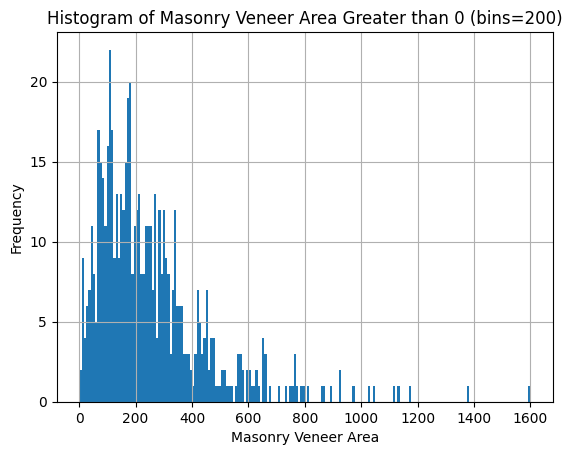

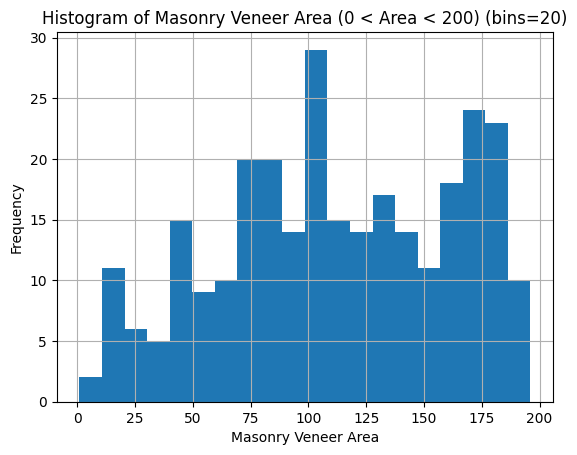

In [52]:
# NOTE: what is a reasonable area for the masonry veneer? 11 square feet can be reasonable, but 1 feels unreasonable
# We can consider 1 as not having masonry veneer and set it to 0.

train[train['MasVnrArea'] > 0]['MasVnrArea'].hist(bins=200)
plt.title("Histogram of Masonry Veneer Area Greater than 0 (bins=200)")
plt.xlabel("Masonry Veneer Area")
plt.ylabel("Frequency")

plt.figure()
train[(train['MasVnrArea'] < 200) & (train['MasVnrArea'] > 0)]['MasVnrArea'].hist(bins=20)
plt.title("Histogram of Masonry Veneer Area (0 < Area < 200) (bins=20)")
plt.xlabel("Masonry Veneer Area")
plt.ylabel("Frequency")
plt.show()

In [53]:
# impute the missing data with their neighborhoods majority vote
index = train[train['MasVnrType'].isna()].index
for idx in train[train['MasVnrType'].isna()].index:
  # filter the dataframe to the counts of masonry veneer types that exist within a neighborhood with NaN values for the masonry type
  impute_value = train[train['Neighborhood'] == train.loc[idx, 'Neighborhood']]['MasVnrType'].value_counts()
  if 'None' in impute_value.index: # since we are assuming the house DOES have masonry veneer, excluse houses with no masonry veneer
    impute_value = impute_value.drop('None')
  train.loc[idx, 'MasVnrType'] = impute_value.sort_values(ascending=False).index[0] # pickout the majority vote
display(train.loc[index])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,BrkFace,288.0,3,3,CBlock,3,3,No,Rec,247,Unf,0,485,732,GasA,4,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,3,8,Min2,1,3,Attchd,1972.0,RFn,2,484,3,3,Y,148,0,0,0,147,0,0,NaN,NaN,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,1.0,3,3,CBlock,3,3,No,Rec,456,Unf,0,456,912,GasA,5,Y,FuseA,912,0,0,912,0,0,1,0,2,1,3,5,Typ,0,0,Attchd,1958.0,RFn,1,275,3,3,Y,0,0,0,0,0,0,0,NaN,NaN,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,BrkFace,1.0,3,3,CBlock,4,3,No,GLQ,498,Rec,211,652,1361,GasA,5,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,3,12,Typ,1,3,BuiltIn,1977.0,RFn,2,600,3,3,N,155,24,145,0,0,0,0,NaN,Gar2,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,344.0,4,3,PConc,4,3,No,GLQ,694,Unf,0,284,978,GasA,5,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,4,9,Typ,1,3,Attchd,1999.0,Fin,2,490,3,3,Y,0,0,0,0,0,0,0,NaN,NaN,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,312.0,3,3,CBlock,3,3,No,LwQ,765,Unf,0,0,765,GasA,3,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,3,7,Min1,0,0,Attchd,1970.0,Unf,2,440,3,3,Y,0,36,0,0,0,0,0,NaN,NaN,0,5,2009,WD,Normal,125000


## Pool cleaning


 Almost every data entry for 'PoolQC' is NaN, which is supposed to indicate no pool. Let's check if there are any pools with areas > 0, but with a quality condition of NaN. There are 1453 NaN values for 'PoolQC', so there should be only 7 data entries with pools since there are 1460 total rows

In [54]:
train[train['PoolArea'] > 0][['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
197,512,5
810,648,2
1170,576,4
1182,555,5
1298,480,4
1386,519,2
1423,738,4


In [55]:
# This data looks fine, so there are no issues with the pool data, we just need to convert the NaN values to a string
train['PoolQC'] = train['PoolQC'].fillna('NA')
train['PoolQC'].value_counts()

,count
PoolQC,
0,1453
4,3
5,2
2,2


## Misc Features

In [56]:
train['MiscFeature'].value_counts()

,count
MiscFeature,
Shed,49
Gar2,2
Othr,2
TenC,1


There doesn't seem to be a lot of misc features, so this column might be worth dropping. Let's see if there is any noticeable difference in sale prices when a misc feature is present additionally let's check if any houses without misc features have a misc value.

In [57]:
display(train[pd.isna(train['MiscFeature']) == False].head(10))
print("Number of rows with misc. features:", train[pd.isna(train['MiscFeature']) == False].shape[0])
print("Number of rows without misc. features and a misc. value > 0:", train[pd.isna(train['MiscFeature']) & (train['MiscVal'] > 0)].shape[0])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4,3,No,GLQ,732,Unf,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,0,Attchd,1993.0,Unf,2,480,3,3,Y,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4,3,Mn,ALQ,859,BLQ,32,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3,Attchd,1973.0,RFn,2,484,3,3,Y,235,204,228,0,0,0,0,NaN,Shed,350,11,2009,WD,Normal,200000
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,3,3,CBlock,3,3,No,ALQ,578,Unf,0,426,1004,GasA,5,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,3,5,Typ,1,3,Attchd,1970.0,Fin,2,480,3,3,Y,0,0,0,0,0,0,0,NaN,Shed,700,3,2010,WD,Normal,149000
17,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,Slab,0,0,NaN,NaN,0,NaN,0,0,0,GasA,3,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,3,6,Typ,0,0,CarPort,1967.0,Unf,2,516,3,3,Y,0,0,0,0,0,0,0,NaN,Shed,500,10,2006,WD,Normal,90000
51,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,PConc,3,3,No,Unf,0,Unf,0,816,816,GasA,3,Y,SBrkr,816,0,360,1176,0,0,1,0,3,1,3,6,Typ,1,4,Detchd,1985.0,Unf,2,528,3,3,Y,112,0,0,0,0,0,0,MnPrv,Shed,400,9,2006,WD,Normal,114500
84,80,RL,NaN,8530,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,22.0,3,3,PConc,4,3,No,Unf,0,Unf,0,384,384,GasA,4,Y,SBrkr,804,670,0,1474,0,0,2,1,3,1,3,7,Typ,1,3,BuiltIn,1995.0,Fin,2,400,3,3,Y,120,72,0,0,0,0,0,NaN,Shed,700,5,2009,WD,Normal,168500
95,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,5,4,PConc,4,4,No,ALQ,310,Unf,0,370,680,GasA,4,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,3,6,Typ,1,3,BuiltIn,1993.0,Fin,2,420,3,3,Y,232,63,0,0,0,0,0,NaN,Shed,480,4,2009,WD,Normal,185000
98,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,No,ALQ,108,Unf,0,350,458,GasA,2,N,SBrkr,835,0,0,835,0,0,1,0,2,1,3,5,Typ,0,0,Basment,1920.0,Unf,1,366,2,3,Y,0,0,77,0,0,0,0,NaN,Shed,400,5,2010,COD,Abnorml,83000
99,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3,3,No,ALQ,569,Unf,0,381,950,GasA,2,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,3,6,Typ,0,0,NaN,NaN,NaN,0,0,0,0,Y,352,0,0,0,0,0,0,NaN,Shed,400,1,2010,WD,Normal,128950
106,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,7,1885,1995,Mansard,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,2,3,No,Unf,0,Unf,0,641,641,GasA,4,Y,SBrkr,1047,0,0,1047,0,0,1,0,2,1,3,6,Typ,0,0,Detchd,1954.0,Unf,1,273,2,2,N,0,0,0,0,0,0,0,NaN,Shed,450,8,2007,WD,Normal,100000


Number of rows with misc. features: 54
Number of rows without misc. features and a misc. value > 0: 0


It is not immediately clear that the misc features affect the price, let's determine whether there exists a relationship between these variables.

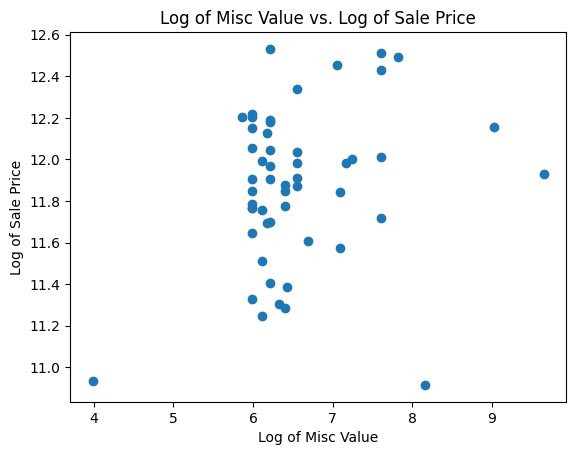

In [58]:
plt.scatter(np.log(train[train['MiscVal'] > 0]['MiscVal']), np.log(train[train['MiscVal'] > 0]['SalePrice']))
plt.xlabel("Log of Misc Value")
plt.ylabel("Log of Sale Price")
plt.title("Log of Misc Value vs. Log of Sale Price")
plt.show()

In [59]:
# There doesn't seem to be a clear relationship, so it might be best to drop the feature
train.drop('MiscFeature', axis=1, inplace=True)

In [60]:
# For the fence column, an NA value indicates no fence
train['Fence'] = train['Fence'].fillna('NA')
train['Fence'].value_counts()

,count
Fence,
NA,1179
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [61]:
# For the alley column, any NA value is meant to indicate no alley access
train['Alley'] = train['Alley'].fillna('NA')
train['Alley'].value_counts()

,count
Alley,
NA,1369
Grvl,50
Pave,41


## Garage Features

We are missing 81 values in three different columns pertaining to garages. Chances are this indicates the houses lack garages

In [62]:
# Let's check whether there exists values in other garage columns when the type is NaN
display(train[train['GarageType'].isna()][['GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].sum())
# Let's also determine if the NaNs are all in the same columns
display(train[train['GarageType'].isna()][['GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].isna().sum())

,0
GarageYrBlt,0.0
GarageFinish,0
GarageType,0
GarageCars,0
GarageArea,0
GarageQual,0
GarageCond,0


,0
GarageYrBlt,81
GarageFinish,81
GarageType,81
GarageCars,0
GarageArea,0
GarageQual,0
GarageCond,0


All the NaNs are in the same rows, so this definitely indicates the lack of garage.

Setting the garage year built to some arbitrary value like 0 would be inappropriate because it would violate the scale of the rest of the data in that column.
It is likely that this feature is correlated with the other garage features, and that we can safely drop it while retaining similar information with the added benefit that all of the other garage variables are able to safely indicate the information about whether a garage exists or not.

Based on the coorelation matrix above, the year the garage was built is highly coorelated with the year the house was built (0.825667) which implies that many garages were built at the same time as the home itself. Of all the garage variables this one also had the lowest correlation with the outcome variable.

For these reasons, we believe that it is safer to remove the GarageYrBlt column from our data set than to impute in a way that might be illogical or disingenous to the true data. This will result in relying more on the year built and other garage variables but their data is more reasonable and has a higher coorelation anyway.

In [63]:
train['GarageFinish'] = train['GarageFinish'].fillna('NA')
train['GarageType'] = train['GarageType'].fillna('NA')

train.drop('GarageYrBlt', axis=1, inplace=True)

## Basement Features

The next feature to fill NA values is the basement features. We have 37-38 rows with NAs, so let's first check if they overlap.

In [64]:
train[train['BsmtFinType2'].isna() & train['BsmtFinType1'].isna() & train['BsmtExposure'].isna()][['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']].isna().sum()

,0
BsmtFinType1,37
BsmtFinType2,37
BsmtExposure,37


In [65]:
# 37 rows seem to overlap, but it seems there are 1-2 rows where the FinType1 is not NA and the other two columns are. Let's investigate this
train[train['BsmtFinType2'].isna() | train['BsmtFinType1'].isna() | train['BsmtExposure'].isna()][['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']].drop_duplicates()

,BsmtFinType1,BsmtFinType2,BsmtExposure
17,NaN,NaN,NaN
332,GLQ,NaN,No
948,Unf,Unf,NaN


A NaN value is supposed to indicate the lack of a basement. It is possible according to the dataset description to only have one finish type. It doesn't make sense for the basement to exist and have an exposure of NaN though, so this last row above will need to be imputed.

In [66]:
# Let's look at what the most common exposure type is when the basement is unfinished.
train[(train['BsmtFinType1'] == 'Unf') & (train['BsmtFinType2'] == 'Unf')]['BsmtExposure'].value_counts()

,count
BsmtExposure,
No,345
Av,46
Mn,27
Gd,11


In [67]:
# let's fill all the NaN values with the string NA now to indicate no basement
train.loc[948, 'BsmtExposure'] = 'No'
train['BsmtExposure'] = train['BsmtExposure'].fillna('NA')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('NA')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('NA')

## Lot Frontage (Regression)

Our final column with NaN values is the lot frontage column

In [68]:
train['LotFrontage'].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


Text(0.5, 0, 'Lot Frontage')

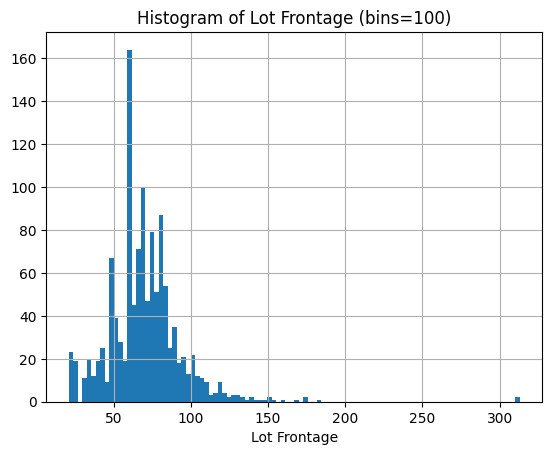

In [69]:
# Let's take a look at the distribution graphically
train['LotFrontage'].hist(bins=100)
plt.title("Histogram of Lot Frontage (bins=100)")
plt.xlabel("Lot Frontage")

The size of the lot frontage is going to vary depending on the house, so the only way to fill the NaN values will be to impute them. It would be inappropriate to set all the missing values to a fixed range of values, so it may be best to fit a regression model specifically for the lot frontage.

In [70]:
train[train['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4,3,Mn,ALQ,859,BLQ,32,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3,Attchd,RFn,2,484,3,3,Y,235,204,228,0,0,0,0,NA,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,3,3,CBlock,3,3,No,ALQ,737,Unf,0,175,912,GasA,3,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,3,4,Typ,0,0,Detchd,Unf,1,352,3,3,Y,140,0,0,0,176,0,0,NA,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,3,3,CBlock,3,3,No,BLQ,733,Unf,0,520,1253,GasA,3,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,3,5,Typ,1,2,Attchd,RFn,1,352,3,3,Y,0,213,176,0,0,0,0,GdWo,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,3,3,CBlock,3,3,No,ALQ,578,Unf,0,426,1004,GasA,5,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,3,5,Typ,1,3,Attchd,Fin,2,480,3,3,Y,0,0,0,0,0,0,0,NA,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,3,4,CBlock,3,3,Mn,Rec,188,ALQ,668,204,1060,GasA,5,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,4,6,Typ,1,3,Attchd,Unf,1,270,3,3,Y,406,90,0,0,0,0,0,MnPrv,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,4,4,CBlock,4,3,No,BLQ,678,Unf,0,762,1440,GasA,5,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,4,7,Typ,1,3,Attchd,Fin,2,467,3,3,Y,0,0,99,0,0,0,0,NA,0,4,2007,WD,Normal,182900
1431,120,RL,NaN,4928,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,LwQ,958,Unf,0,0,958,GasA,3,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,3,5,Typ,0,0,Attchd,RFn,2,440,3,3,Y,0,60,0,0,0,0,0,NA,0,10,2009,WD,Normal,143750
1441,120,RM,NaN,4426,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,4,3,PConc,4,3,Av,GLQ,697,Unf,0,151,848,GasA,5,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,4,3,Typ,1,3,Attchd,RFn,2,420,3,3,Y,149,0,0,0,0,0,0,NA,0,5,2008,WD,Normal,149300
1443,30,RL,NaN,8854,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,No,Unf,0,Unf,0,952,952,Grav,2,N,FuseF,952,0,0,952,0,0,1,0,2,1,2,4,Typ,1,4,Detchd,Unf,1,192,2,1,P,0,98,0,0,40,0,0,NA,0,5,2009,WD,Normal,121000


In [71]:
# let's prepare a separate copy of our data specifically for predicting the lot frontage
lot_front = train[train['LotFrontage'].isna() == False].copy()
lot_front.drop('SalePrice', axis=1, inplace=True)

# fit a one hot encoder on categorical data that we can use later on the unseen test data
lot_encoder = OneHotEncoder(drop="first", handle_unknown="ignore")
features = lot_encoder.fit_transform(lot_front.select_dtypes(exclude=['number']))
features = pd.DataFrame(features.toarray(), columns=lot_encoder.get_feature_names_out())

# merge numerical and categorical data back together
lot_front = pd.concat([features, lot_front.select_dtypes(include=['number']).reset_index(drop=True)], axis=1)

Now, let's tune a model for predicting the lot frontage

In [73]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', XGBRegressor(random_state=480))
  ])

search_space = {
    'regressor__n_estimators': Integer(100, 1000),
    'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'regressor__max_depth': Integer(3, 10),
    'regressor__subsample': Real(0.5, 1.0),
    'regressor__colsample_bytree': Real(0.5, 1.0),
    'regressor__reg_alpha': Real(1e-8, 1, prior='log-uniform'),
    'regressor__gamma': Real(1e-8, 1, prior='log-uniform'),
    'regressor__reg_lambda': Real(1e-8, 1, prior='log-uniform'),
    'regressor__tree_method': Categorical(['exact', 'hist']),
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=  search_space,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    n_jobs=-1,
    verbose=1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # ensures random initial sampling
)

opt.fit(lot_front.drop('LotFrontage', axis=1), lot_front['LotFrontage'])
lot_score = opt.best_score_*-1
print(opt.best_params_)
print("XGBRegressor had a RMSE score on the training set of:", lot_score)

In [72]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', XGBRegressor(random_state=480, tree_method='exact'))
  ])

params = dict([('regressor__colsample_bytree', 0.5740930698440057), ('regressor__gamma', 0.1256364035886629), ('regressor__learning_rate', 0.02553936969755543), ('regressor__max_depth', 5), ('regressor__n_estimators', 362), ('regressor__reg_alpha', 4.590882489068013e-08), ('regressor__reg_lambda', 2.5977145830329583e-06), ('regressor__subsample', 1.0), ('regressor__tree_method', 'hist')])
pipeline.set_params(**params)

pipeline.fit(lot_front.drop('LotFrontage', axis=1), lot_front['LotFrontage'])
y_pred = pipeline.predict(lot_front.drop('LotFrontage', axis=1))

In [ ]:
# Impute the data using the mean as a full baseline for our final model without the regressor predictor
# train.loc[train[train['LotFrontage'].isna()].index, 'LotFrontage']  = [train['LotFrontage'].mean()]*len(train[train['LotFrontage'].isna()])

In [74]:
# The performance is better than the baseline, so we should impute the data using our linear model
final_lot_front = train[train['LotFrontage'].isna()].copy()
final_lot_front.drop(['SalePrice', 'LotFrontage'], axis=1, inplace=True)
lot_front_pipeline = pipeline

# encode the data based on our previous encoder we defined (new columns in test data are ignored, missing columns are set to 0s)
features = lot_encoder.transform(final_lot_front.select_dtypes(exclude=['number']))
features = pd.DataFrame(features.toarray(), columns=lot_encoder.get_feature_names_out())
final_lot_front = pd.concat([features, final_lot_front.select_dtypes(include=['number']).reset_index(drop=True)], axis=1)

# impute the data back into the original column
train.loc[train[train['LotFrontage'].isna()].index, 'LotFrontage']  = lot_front_pipeline.predict(final_lot_front)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5, 10, 13, 14, 22, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [75]:
train['LotFrontage'].describe()

,LotFrontage
count,1460.000000
mean,70.530393
std,23.546864
min,21.000000
25%,59.735811
50%,70.000000
75%,81.457243
max,313.000000


# Feature Selection

In [76]:
# One hot encoding
kf = KFold(n_splits=5, shuffle=True, random_state=480)

encoder = OneHotEncoder(drop="first", handle_unknown="ignore")
features = encoder.fit_transform(train.select_dtypes(exclude=['number']))
features = pd.DataFrame(features.toarray(), columns=encoder.get_feature_names_out())

train_encoded = pd.concat([features, train.select_dtypes(include=['number']).reset_index(drop=True)], axis=1)
train_encoded

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1

In [77]:
X_train, y_train = train_encoded.drop('SalePrice', axis=1), np.log(train_encoded['SalePrice'])

In [78]:
# PCA

scaler = StandardScaler()
scaler.fit(X_train)

scaled_encoded_features = scaler.transform(X_train)
# TODO scale test data same way (DO NOT FIT)

pca = PCA(n_components=0.95, copy = True)
# select number of components s.t. the amount of variance explained is greater than parameter
train_princ_comp = pca.fit_transform(scaled_encoded_features)

print("Variance explained by each feature:", pca.explained_variance_ratio_)
print("Total Explained Variance", pca.explained_variance_ratio_.sum())

Variance explained by each feature: [0.06866058 0.03281837 0.02693854 0.02503537 0.02136745 0.0192703
 0.01783612 0.01593015 0.01377884 0.01296873 0.01267481 0.01203819
 0.01177483 0.01166245 0.01099596 0.01065934 0.01055797 0.01022422
 0.00981353 0.00946947 0.00944635 0.00931741 0.00917472 0.00904238
 0.00882872 0.00868872 0.00850759 0.00831559 0.00824114 0.00805565
 0.00788833 0.00772266 0.00757264 0.00751835 0.00735977 0.00728017
 0.00719107 0.00714639 0.00702159 0.00692871 0.00675686 0.00666196
 0.00662974 0.00651076 0.00644166 0.00634241 0.00618779 0.00614895
 0.00612553 0.0060548  0.00597993 0.0059096  0.00585375 0.00578978
 0.00575732 0.00563177 0.00557495 0.00553841 0.00544474 0.0053944
 0.00537173 0.00533381 0.00523893 0.00520071 0.00516396 0.00508401
 0.00506019 0.0049488  0.00494078 0.0049173  0.00485305 0.00479579
 0.00477784 0.00471508 0.00469303 0.00465731 0.00461457 0.00459138
 0.00456528 0.0044831  0.00445794 0.00437656 0.00434246 0.00430943
 0.00426862 0.00424795 0.004

Doing PCA on the encoded features we are able to remove 77 variables from the dataset while still accounting for 95% of variance.

# Support Vector Regression


In [ ]:
# fitting a support vector regression
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('regressor', SVR(kernel='rbf'))
  ])

search_space = {
    'regressor__C': Real(1e-3, 1e3, prior='log-uniform'),
    'regressor__epsilon': Real(1e-4, 1.0, prior='log-uniform'),
    'regressor__gamma': Real(1e-4, 10.0, prior='log-uniform'),
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces= search_space,
    n_iter=60,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    verbose=1,
    n_jobs=-1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # random sample
)

opt.fit(X_train, y_train)
sv_score = opt.best_score_*-1
print(opt.best_params_)
print("SVR had a RMSE score on the training set of:", sv_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [79]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', SVR(kernel='rbf'))
  ])

params = dict([('regressor__C', 4.902613786250835), ('regressor__epsilon', 0.002170553741493909), ('regressor__gamma', 0.0005887722737556284)])
pipeline.set_params(**params)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
sv = pipeline

In [ ]:
# SVR after PCA
opt.fit(train_princ_comp, y_train)
sv_pca_score = opt.best_score_*-1
print(opt.best_params_)
print("SVR PCA had a RMSE score on the training set of:", sv_pca_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [80]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', SVR(kernel='rbf'))
  ])

params = dict([('regressor__C', 5.086850477580782), ('regressor__epsilon', 0.0001), ('regressor__gamma', 0.0010553017522704647)])
pipeline.set_params(**params)

pipeline.fit(train_princ_comp, y_train)
y_pred = pipeline.predict(train_princ_comp)
sv_pca = pipeline

# Ridge, LASSO, Elastic Regression

In [ ]:
# fitting a ridge regression
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('regressor', Ridge(random_state=480))
  ])

search_space = {
    'regressor__alpha': Real(1e-3, 1e3, prior='log-uniform'),
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces= search_space,
    n_iter=40,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    verbose=1,
    n_jobs=-1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # random sample
)

opt.fit(X_train, y_train)
ridge_score = opt.best_score_*-1
print(opt.best_params_)
print("Ridge had a RMSE score on the training set of:", ridge_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [81]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', Ridge(random_state=480))
  ])

params = dict([('regressor__alpha', 498.8892240013781)])
pipeline.set_params(**params)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
ridge = pipeline

In [ ]:
# Ridge after PCA
opt.fit(train_princ_comp, y_train)
ridge_pca_score = opt.best_score_*-1
print(opt.best_params_)
print("Ridge PCA had a RMSE score on the training set of:", ridge_pca_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [82]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', Ridge(random_state=480))
  ])

params = dict([('regressor__alpha', 103.65339746421868)])
pipeline.set_params(**params)

pipeline.fit(train_princ_comp, y_train)
y_pred = pipeline.predict(train_princ_comp)
ridge_pca = pipeline

### Lasso below

In [ ]:
# fitting a lasso regression
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('regressor', Lasso(random_state=480))
  ])

search_space = {
    'regressor__alpha': Real(1e-3, 1e3, prior='log-uniform'),
    'regressor__selection': Categorical(['cyclic', 'random'])
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces= search_space,
    n_iter=40,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    verbose=1,
    n_jobs=-1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # random sample
)

opt.fit(X_train, y_train)
lasso_score = opt.best_score_*-1
print(opt.best_params_)
print("Lasso had a RMSE score on the training set of:", lasso_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [83]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', Lasso(random_state=480))
  ])

params = dict([('regressor__alpha', 0.004601335165521149), ('regressor__selection', 'random')])
pipeline.set_params(**params)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
lasso = pipeline

In [ ]:
# Lasso after PCA
opt.fit(train_princ_comp, y_train)
lasso_pca_score = opt.best_score_*-1
print(opt.best_params_)
print("Lasso PCA had a RMSE score on the training set of:", lasso_pca_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [84]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', Lasso(random_state=480))
  ])

params = dict([('regressor__alpha', 0.004329996624988708), ('regressor__selection', 'random')])
pipeline.set_params(**params)

pipeline.fit(train_princ_comp, y_train)
y_pred = pipeline.predict(train_princ_comp)
lasso_pca = pipeline

### Elastic net

In [ ]:
# fitting a elastic net regression
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('regressor', ElasticNet(random_state=480))
  ])

search_space = {
    'regressor__alpha': Real(1e-3, 1e3, prior='log-uniform'),
    'regressor__l1_ratio': Real(0.0, 1.0),
    'regressor__selection': Categorical(['cyclic', 'random'])
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces= search_space,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    verbose=1,
    n_jobs=-1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # random sample
)

opt.fit(X_train, y_train)
elastic_score = opt.best_score_*-1
print(opt.best_params_)
print("Elastic had a RMSE score on the training set of:", elastic_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [85]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', ElasticNet(random_state=480))
  ])

params = dict([('regressor__alpha', 0.028492715855333653), ('regressor__l1_ratio', 0.17615468922421829), ('regressor__selection', 'random')])
pipeline.set_params(**params)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
elastic = pipeline

In [ ]:
# elastic after PCA
opt.fit(train_princ_comp, y_train)
elastic_pca_score = opt.best_score_*-1
print(opt.best_params_)
print("Elastic PCA had a RMSE score on the training set of:", elastic_pca_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [86]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', ElasticNet(random_state=480))
  ])

params = dict([('regressor__alpha', 0.008362858597060494), ('regressor__l1_ratio', 0.5253908998987702), ('regressor__selection', 'random')])
pipeline.set_params(**params)

pipeline.fit(train_princ_comp, y_train)
y_pred = pipeline.predict(train_princ_comp)
elastic_pca = pipeline

# Random Forest

In [ ]:
# fitting a random forest regression
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('regressor', RandomForestRegressor(random_state=480, bootstrap=False))
  ])

search_space = {
    'regressor__n_estimators': Integer(100, 1500),
    'regressor__max_depth': Integer(3, 50),
    'regressor__min_samples_split': Integer(2, 10, prior='log-uniform'),
    'regressor__min_samples_leaf': Integer(1, 5, prior='log-uniform'),
    'regressor__max_features': Categorical(['sqrt', 'log2', None])
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces= search_space,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    verbose=1,
    n_jobs=-1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # random sample
)

opt.fit(X_train, y_train)
forest_score = opt.best_score_*-1
print(opt.best_params_)
print("Random Forest had a RMSE score on the training set of:", forest_score)

In [87]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', RandomForestRegressor(random_state=480, bootstrap = False))
  ])

params = dict([('regressor__max_depth', 50), ('regressor__max_features', 'sqrt'), ('regressor__min_samples_leaf', 1), ('regressor__min_samples_split', 2), ('regressor__n_estimators', 1388)])
pipeline.set_params(**params)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
forest = pipeline

Random Forest does not like PCA

# XGBRegressor

In [ ]:
# fitting a xgb regression
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('regressor', XGBRegressor(random_state=480))
  ])

search_space = {
    'regressor__n_estimators': Integer(100, 5000),
    'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'regressor__max_depth': Integer(3, 50),
    'regressor__subsample' : Real(0.5, 1.0),
    'regressor__colsample_bytree' : Real(0.05, 1.0),
    'regressor__reg_lambda': Real(1e-8, 1, prior='log-uniform'),
    'regressor__gamma': Real(1e-8, 1, prior='log-uniform'),
    'regressor__reg_alpha': Real(1e-8, 1, prior='log-uniform'),
    'regressor__tree_method': Categorical(['hist', 'exact'])
    }

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces= search_space,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=480,
    verbose=1,
    n_jobs=-1,
    optimizer_kwargs={'initial_point_generator': 'random'}  # random sample
)

opt.fit(X_train, y_train)
xgb_score = opt.best_score_*-1
print(opt.best_params_)
print("XGB had a RMSE score on the training set of:", xgb_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [88]:
pipeline = Pipeline(steps=[
      ('scaler', StandardScaler()),  # Scale the data before fitting the regression
      ('regressor', XGBRegressor(random_state=480))
  ])

params = dict([('regressor__colsample_bytree', 0.10043716802061281), ('regressor__gamma', 1e-08), ('regressor__learning_rate', 0.01), ('regressor__max_depth', 3), ('regressor__n_estimators', 4965), ('regressor__reg_alpha', 0.003590783865551825), ('regressor__reg_lambda', 2.3231400401175516e-07), ('regressor__subsample', 0.5), ('regressor__tree_method', 'exact')])
pipeline.set_params(**params)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
xgb = pipeline

In [ ]:
# # xgb after PCA
# opt.fit(train_princ_comp, y_train)
# xgb_pca_score = opt.best_score_*-1
# print(opt.best_params_)

In [ ]:
# pipeline = Pipeline(steps=[
#       ('scaler', StandardScaler()),  # Scale the data before fitting the regression
#       ('regressor', XGBRegressor(random_state=480, tree_method='hist'))
#   ])

# params = dict()
# pipeline.set_params(**params)

# pipeline.fit(train_princ_comp, y_train)
# y_pred = pipeline.predict(train_princ_comp)
# xgb_pca = pipeline

# print("XGB PCA had a RMSE score on the training set of:", xgb_pca_score)

# Final Cross Validation

Vross validation on all combination of models (without PCA)

In [89]:
models = {'sv': sv, 'ridge': ridge, 'lasso': lasso, 'elastic': elastic, 'rf': forest, 'xgb': xgb}
results = {'sv': [], 'ridge': [], 'lasso': [], 'elastic': [], 'rf': [], 'xgb':[],
           'elastic+ridge':[], 'elastic+rf':[], 'elastic+sv':[], 'elastic+lasso':[], 'elastic+xgb':[],
           'ridge+sv':[], 'ridge+rf':[], 'ridge+lasso':[], 'ridge+xgb':[],
           'lasso+sv':[], 'lasso+rf':[], 'lasso+xgb':[],
           'sv+rf':[], 'sv+xgb':[],
           'rf+xgb':[],
           'e+rd+rf':[], 'e+rd+lasso':[], 'e+rd+sv':[], 'e+rd+xgb':[], 'e+xgb+rf':[], 'e+lasso+xgb':[],
           'rf+r+lasso':[], 'rf+r+xgb':[], 'rf+s+xgb':[],
           '(rf+e)+xgb':[], '(rf+s)+xgb':[],
           'rf+r+lasso+xgb':[], 'rf+e+r+xgb':[],
           'all':[]
          }

kf = KFold(n_splits=5, shuffle=True, random_state=480)

for fold in kf.split(train_encoded):
  train_index, test_index = fold
  train_data = train_encoded.iloc[train_index]
  test_data = train_encoded.iloc[test_index]
  X_train = train_data.drop('SalePrice', axis=1)
  y_train = np.log(train_data['SalePrice'])
  X_test = test_data.drop('SalePrice', axis=1)
  y_test = np.log(test_data['SalePrice'])

  predictions = [] # 0:sv, 1:ridge, 2:lasso, 3:elastic, 4:rf, 5:xgb
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    results[model_name].append(np.sqrt(mean_squared_error(y_test, y_pred)))

  results['elastic+ridge'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[1])/2)))
  results['elastic+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[4])/2)))
  results['elastic+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[0])/2)))
  results['elastic+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[2])/2)))
  results['elastic+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[5])/2)))
  results['ridge+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[0])/2)))
  results['ridge+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[2])/2)))
  results['ridge+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[4])/2)))
  results['ridge+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[5])/2)))
  results['lasso+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions[0])/2)))
  results['lasso+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions[4])/2)))
  results['lasso+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions[5])/2)))
  results['sv+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[4])/2)))
  results['sv+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[5])/2)))
  results['rf+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[5])/2)))

  results['e+rd+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[4] + predictions[1])/3)))
  results['e+rd+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[2] + predictions[1])/3)))
  results['e+rd+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[0] + predictions[1])/3)))
  results['e+rd+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[1] + predictions[5])/3)))
  results['e+xgb+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[5] + predictions[4])/3)))
  results['e+lasso+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[2] + predictions[5])/3)))
  results['rf+r+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[1] + predictions[2])/3)))
  results['rf+r+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[1] + predictions[5])/3)))
  results['rf+s+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[0] + predictions[5])/3)))
  results['(rf+e)+xgb'].append(np.sqrt(mean_squared_error(y_test, ((predictions[4] + predictions[3])/2 + predictions[5])/2)))
  results['(rf+s)+xgb'].append(np.sqrt(mean_squared_error(y_test, ((predictions[4] + predictions[0])/2 + predictions[5])/2)))

  results['rf+r+lasso+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[1] + predictions[2] + predictions[5])/4)))
  results['rf+e+r+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[3] + predictions[1] + predictions[5])/4)))

  results['all'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[1] + predictions[2] + predictions[3] + predictions[4] + predictions[5])/6)))

results_df = pd.DataFrame(results)

In [90]:
results_df.mean().sort_values()

,0
sv+xgb,0.121653
(rf+s)+xgb,0.123141
rf+s+xgb,0.123807
xgb,0.125216
sv+rf,0.127128
(rf+e)+xgb,0.127166
sv,0.127325
rf+xgb,0.128338
e+xgb+rf,0.129209
all,0.129515


A mixture between the support vector and XGB seems to produce the best accuracy. Let's look at what the difference between predicted and actual values looks like

In [91]:
results = []
index = []
for fold in kf.split(train_encoded):
  train_index, test_index = fold
  train_data = train_encoded.iloc[train_index]
  test_data = train_encoded.iloc[test_index]
  X_train = train_data.drop('SalePrice', axis=1)
  y_train = np.log(train_data['SalePrice'])
  X_test = test_data.drop('SalePrice', axis=1)
  y_test = np.log(test_data['SalePrice'])

  index += list(y_test.index)
  sv.fit(X_train, y_train)
  xgb.fit(X_train, y_train)
  y_pred = (sv.predict(X_test) + xgb.predict(X_test))/2
  results += list(y_pred)

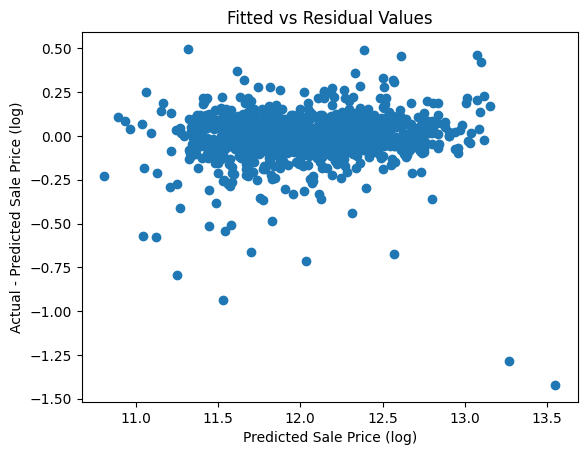

In [ ]:
temp = pd.DataFrame({'Id': index, 'Prediction': results}).sort_values('Id').set_index('Id')
temp['Actual'] = np.log(train_encoded['SalePrice'])

plt.scatter(temp['Prediction'], temp['Actual'] - temp['Prediction'])
plt.xlabel('Predicted Sale Price (log)')
plt.ylabel('Actual - Predicted Sale Price (log)')
plt.title('Fitted vs Residual Values')
plt.show()

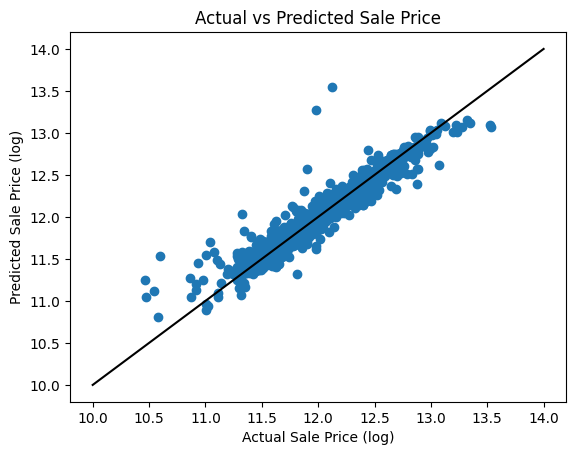

In [ ]:
plt.scatter(temp['Actual'], temp['Prediction'])
plt.plot(range(10, 15), range(10, 15), color='black')
plt.xlabel('Actual Sale Price (log)')
plt.ylabel('Predicted Sale Price (log)')
plt.title('Actual vs Predicted Sale Price')
plt.show()

Cross val on only PCA data

In [ ]:
# random forest and XGB were not fit for pca as the initial attempts showed that they would take many hours to run
models_pcas = {'sv_pca':sv_pca, 'ridge_pca':ridge_pca, 'lasso_pca':lasso_pca, 'elastic_pca':elastic_pca, 'forest_pca':forest, 'xgb_pca':xgb}
results = {'sv_pca': [], 'ridge_pca': [], 'lasso_pca': [], 'elastic_pca': [], 'forest_pca': [], 'xgb_pca':[],
           'elastic+ridge':[], 'elastic+rf':[], 'elastic+sv':[], 'elastic+lasso':[], 'elastic+xgb':[],
           'ridge+sv':[], 'ridge+rf':[], 'ridge+lasso':[], 'ridge+xgb':[],
           'lasso+sv':[], 'lasso+rf':[], 'lasso+xgb':[],
           'sv+rf':[], 'sv+xgb':[],
           'rf+xgb':[],
           'e+rd+rf':[], 'e+rd+lasso':[], 'e+rd+sv':[], 'e+rd+xgb':[], 'e+xgb+rf':[], 'e+lasso+xgb':[],
           'rf+r+lasso':[], 'rf+r+xgb':[], 'rf+s+xgb':[],
           '(rf+e)+xgb':[], '(rf+s)+xgb':[],
           'rf+r+lasso+xgb':[], 'rf+e+r+xgb':[],
           'all':[]
          }

kf = KFold(n_splits=5, shuffle=True, random_state=480)

for fold in kf.split(train_encoded):
  train_index, test_index = fold
  train_data = train_encoded.iloc[train_index]
  test_data = train_encoded.iloc[test_index]

  scaler = StandardScaler()
  pca = PCA(n_components=0.95, copy = True)

  X_train = pca.fit_transform(scaler.fit_transform(train_data.drop('SalePrice', axis=1)))
  y_train = np.log(train_data['SalePrice'])
  X_test = pca.transform(scaler.transform(test_data.drop('SalePrice', axis=1)))
  y_test = np.log(test_data['SalePrice'])

  predictions = [] # 0:sv, 1:ridge, 2:lasso, 3:elastic, 4:rf, 5:xgb
  for model_name, model in models_pcas.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    results[model_name].append(np.sqrt(mean_squared_error(y_test, y_pred)))

  results['elastic+ridge'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[1])/2)))
  results['elastic+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[4])/2)))
  results['elastic+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[0])/2)))
  results['elastic+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[2])/2)))
  results['elastic+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[5])/2)))
  results['ridge+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[0])/2)))
  results['ridge+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[2])/2)))
  results['ridge+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[4])/2)))
  results['ridge+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions[5])/2)))
  results['lasso+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions[0])/2)))
  results['lasso+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions[4])/2)))
  results['lasso+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions[5])/2)))
  results['sv+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[4])/2)))
  results['sv+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[5])/2)))
  results['rf+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[5])/2)))

  results['e+rd+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[4] + predictions[1])/3)))
  results['e+rd+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[2] + predictions[1])/3)))
  results['e+rd+sv'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[0] + predictions[1])/3)))
  results['e+rd+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[1] + predictions[5])/3)))
  results['e+xgb+rf'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[5] + predictions[4])/3)))
  results['e+lasso+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions[2] + predictions[5])/3)))
  results['rf+r+lasso'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[1] + predictions[2])/3)))
  results['rf+r+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[1] + predictions[5])/3)))
  results['rf+s+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[0] + predictions[5])/3)))
  results['(rf+e)+xgb'].append(np.sqrt(mean_squared_error(y_test, ((predictions[4] + predictions[3])/2 + predictions[5])/2)))
  results['(rf+s)+xgb'].append(np.sqrt(mean_squared_error(y_test, ((predictions[4] + predictions[0])/2 + predictions[5])/2)))

  results['rf+r+lasso+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[1] + predictions[2] + predictions[5])/4)))
  results['rf+e+r+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions[4] + predictions[3] + predictions[1] + predictions[5])/4)))

  results['all'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[1] + predictions[2] + predictions[3] + predictions[4] + predictions[5])/6)))

results_df = pd.DataFrame(results)

In [ ]:
results_df.mean().sort_values()

,0
lasso+sv,0.138182
elastic+sv,0.138269
e+rd+sv,0.140672
ridge+sv,0.140899
sv_pca,0.141612
e+lasso+xgb,0.145134
lasso_pca,0.146009
elastic+lasso,0.146060
e+rd+xgb,0.146065
elastic_pca,0.146116


Cross val on normal and PCA data

In [ ]:
models_pcas = {'sv':sv_pca, 'ridge':ridge_pca, 'lasso':lasso_pca, 'elastic':elastic_pca, 'rf':forest, 'xgb':xgb}
results = {'sv+sv_pca':[], 'ridge+ridge_pca':[], 'lasso+lasso_pca':[], 'elastic+elastic_pca':[],
           '(lasso_pca+sv_pca)+(sv+xgb)':[], 'lasso_pca+sv_pca+sv+xgb':[], '(lasso_pca+sv_pca)+sv+xgb':[],
           'e_pca+rd_pca+sv_pca+xgb':[], '(e_pca+rd_pca+sv_pca)+xgb':[],
           'all':[]
          }

kf = KFold(n_splits=5, shuffle=True, random_state=480)
# pca.transform(scaler.transform(X_valid))

for fold in kf.split(train_encoded):
  train_index, test_index = fold
  train_data = train_encoded.iloc[train_index]
  test_data = train_encoded.iloc[test_index]

  scaler = StandardScaler()
  pca = PCA(n_components=0.95, copy = True)

  X_train = train_data.drop('SalePrice', axis=1)
  X_train_pca = pca.fit_transform(scaler.fit_transform(train_data.drop('SalePrice', axis=1)))
  y_train = np.log(train_data['SalePrice'])

  X_test = test_data.drop('SalePrice', axis=1)
  X_test_pca = pca.transform(scaler.transform(test_data.drop('SalePrice', axis=1)))
  y_test = np.log(test_data['SalePrice'])

  predictions = [] # 0:sv, 1:ridge, 2:lasso, 3:elastic, 4:rf, 5:xgb
  predictions_pca = []
  for model_name in models:
    models[model_name].fit(X_train, y_train)
    y_pred = models[model_name].predict(X_test)
    predictions.append(y_pred)

    models_pcas[model_name].fit(X_train_pca, y_train)
    y_pred_pca = models_pcas[model_name].predict(X_test_pca)
    predictions_pca.append(y_pred_pca)

  results['sv+sv_pca'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions_pca[0])/2)))
  results['ridge+ridge_pca'].append(np.sqrt(mean_squared_error(y_test, (predictions[1] + predictions_pca[1])/2)))
  results['lasso+lasso_pca'].append(np.sqrt(mean_squared_error(y_test, (predictions[2] + predictions_pca[2])/2)))
  results['elastic+elastic_pca'].append(np.sqrt(mean_squared_error(y_test, (predictions[3] + predictions_pca[3])/2)))

  results['e_pca+rd_pca+sv_pca+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions_pca[3] + predictions_pca[1] + predictions_pca[0] + predictions[5])/4)))
  results['(e_pca+rd_pca+sv_pca)+xgb'].append(np.sqrt(mean_squared_error(y_test, ((predictions_pca[3] + predictions_pca[1] + predictions_pca[0])/3 + predictions[5])/2)))
  results['lasso_pca+sv_pca+sv+xgb'].append(np.sqrt(mean_squared_error(y_test, (predictions_pca[2] + predictions_pca[0] + predictions[0] + predictions[5])/4)))
  results['(lasso_pca+sv_pca)+(sv+xgb)'].append(np.sqrt(mean_squared_error(y_test, ((predictions_pca[2] + predictions_pca[0])/2 + (predictions[0] + predictions[5])/2)/2)))
  results['(lasso_pca+sv_pca)+sv+xgb'].append(np.sqrt(mean_squared_error(y_test, ((predictions_pca[2] + predictions_pca[0])/2 + predictions[0] + predictions[5])/3)))

  results['all'].append(np.sqrt(mean_squared_error(y_test, (predictions[0] + predictions[1] + predictions[2] + predictions[3] + predictions[4] + predictions[5] + predictions_pca[0] + predictions_pca[1] + predictions_pca[2] + predictions_pca[3] + predictions_pca[4] + predictions_pca[5])/12)))

results_df = pd.DataFrame(results)

In [ ]:
results_df.mean().sort_values()

,0
(lasso_pca+sv_pca)+sv+xgb,0.124863
lasso_pca+sv_pca+sv+xgb,0.127382
(lasso_pca+sv_pca)+(sv+xgb),0.127382
(e_pca+rd_pca+sv_pca)+xgb,0.128454
sv+sv_pca,0.132004
e_pca+rd_pca+sv_pca+xgb,0.133545
all,0.135552
lasso+lasso_pca,0.141534
elastic+elastic_pca,0.141726
ridge+ridge_pca,0.145823


# Predicting on Test Set

In [ ]:
test = pd.read_csv('https://drive.google.com/uc?id=1uJLo1O1ZC0OsGPgMNVFE6TMbALerHLhO')
test.set_index('Id', inplace=True)

Cleaning the data using the same steps as the training set

In [ ]:
vars_to_cast = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'PoolQC']
for var in vars_to_cast:
  test[var] = numcast(test[var])

In [ ]:
test.isna().sum()[test.isna().sum() > 0].sort_values(ascending=False)

,0
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
LotFrontage,227
GarageFinish,78
GarageYrBlt,78
GarageType,76
BsmtExposure,44
BsmtFinType1,42


In [ ]:
def imputer(df, col):
  """
  This function imputes using values from the training set and runs a majority vote classifier to impute the missing data for a specified column.
  Specifically, it runs the majority vote on a subset of rows that match the neighborhood of the missing data.
  """
  # impute the missing data with their neighborhoods majority vote
  index = df[df[col].isna()].index
  for idx in df[df[col].isna()].index:
    # filter the dataframe to the counts of masonry veneer types that exist within a neighborhood with NaN values for the masonry type
    impute_value = train[train['Neighborhood'] == df.loc[idx, 'Neighborhood']][col].value_counts()
    if 'None' in impute_value.index: # since we are assuming the house DOES have masonry veneer, excluse houses with no masonry veneer
      impute_value = impute_value.drop('None')
    df.loc[idx, col] = impute_value.sort_values(ascending=False).index[0] # pickout the majority vote
  display(df.loc[index])

In [ ]:
# misc feature tab
test.drop('MiscFeature', axis=1, inplace=True)
test['Fence'] = test['Fence'].fillna('NA')
test['Alley'] = test['Alley'].fillna('NA')

# MasVnr
test[['MasVnrType', 'MasVnrArea']] = test[['MasVnrType', 'MasVnrArea']].apply(
    lambda row : pd.Series(['None',0]) if pd.isna(row.iloc[0]) and (row.iloc[1] == 0 or pd.isna(row.iloc[1])) else row.values, axis=1)
imputer(test, 'MasVnrType')

test['GarageFinish'] = test['GarageFinish'].fillna('NA')
test['GarageType'] = test['GarageType'].fillna('NA')
test.drop('GarageYrBlt', axis=1, inplace=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1670,20,RL,102.0,13514,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,285.0,5,3,PConc,5,3,No,GLQ,1142.0,Unf,0.0,632.0,1774.0,GasA,5,Y,SBrkr,1808,0,0,1808,1.0,0.0,2,0,3,1,5,7,Typ,1,4,Attchd,2008.0,Fin,3.0,850.0,3,3,Y,200,26,0,0,0,0,0,NA,0,3,2009,WD,Normal
2453,20,RM,52.0,8626,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,BrkFace,1.0,3,3,CBlock,0,0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,4,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,3,5,Typ,0,0,Attchd,1956.0,Unf,1.0,331.0,2,3,Y,0,0,0,0,0,0,0,NA,0,5,2007,WD,Normal
2611,20,RL,124.0,27697,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,BrkFace,198.0,3,3,CBlock,3,3,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,3,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,3,6,Typ,0,0,Attchd,1961.0,Unf,1.0,444.0,3,2,Y,152,38,0,0,0,0,0,NA,0,11,2007,COD,Abnorml


In [ ]:
# Impute the unfinished basement types in the same manner as the training set
test.loc[(test['BsmtFinType1'] == 'Unf') & (test['BsmtFinType2'] == 'Unf') & test['BsmtExposure'].isna(), 'BsmtExposure'] = 'No'
test['BsmtExposure'] = test['BsmtExposure'].fillna('NA')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('NA')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('NA')

In [ ]:
imputer(test, 'MSZoning')
imputer(test, 'Utilities')
imputer(test, 'BsmtFullBath')
imputer(test, 'BsmtHalfBath')
imputer(test, 'Functional')
imputer(test, 'Exterior1st')
imputer(test, 'Exterior2nd')
imputer(test, 'SaleType')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,RM,109.0,21780,Grvl,NA,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,CBlock,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,3,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,3,4,Min1,0,0,Detchd,Unf,1.0,280.0,3,3,N,119,24,0,0,0,0,0,NA,0,3,2009,ConLD,Normal
2217,20,RM,80.0,14584,Pave,NA,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,2,1,Slab,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,Wall,1,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,2,4,NaN,0,0,Attchd,Unf,2.0,487.0,2,1,N,0,0,0,0,0,0,0,NA,0,2,2008,WD,Abnorml
2251,70,RM,NaN,56600,Pave,NA,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,5,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,3,7,Maj1,0,0,Detchd,Unf,1.0,288.0,3,2,N,0,0,0,0,0,0,0,NA,0,1,2008,WD,Normal
2905,20,RL,125.0,31250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,3,2,CBlock,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,3,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,3,6,Mod,0,0,Attchd,Unf,1.0,270.0,2,3,N,0,0,135,0,0,0,0,NA,0,5,2006,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,RM,109.0,21780,Grvl,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,CBlock,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,3,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,3,4,Min1,0,0,Detchd,Unf,1.0,280.0,3,3,N,119,24,0,0,0,0,0,NA,0,3,2009,ConLD,Normal
1946,20,RL,NaN,31220,Pave,NA,IR1,Bnk,AllPub,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,3,CBlock,3,3,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,3,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,3,7,Min2,2,4,Attchd,Unf,2.0,495.0,3,3,Y,0,0,144,0,0,0,0,NA,750,5,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3,3,PConc,0,0,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,3,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,3,4,Typ,0,0,Detchd,Unf,1.0,280.0,3,3,Y,0,0,0,0,0,0,0,MnPrv,0,4,2008,ConLD,Abnorml
2189,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,Slab,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,3,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,5,11,Typ,2,4,Attchd,Unf,2.0,624.0,3,3,Y,0,372,0,0,0,0,0,NA,0,7,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3,3,PConc,0,0,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,3,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,3,4,Typ,0,0,Detchd,Unf,1.0,280.0,3,3,Y,0,0,0,0,0,0,0,MnPrv,0,4,2008,ConLD,Abnorml
2189,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,Slab,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,3,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,5,11,Typ,2,4,Attchd,Unf,2.0,624.0,3,3,Y,0,372,0,0,0,0,0,NA,0,7,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2217,20,RM,80.0,14584,Pave,NA,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,2,1,Slab,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,Wall,1,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,2,4,Typ,0,0,Attchd,Unf,2.0,487.0,2,1,N,0,0,0,0,0,0,0,NA,0,2,2008,WD,Abnorml
2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,CBlock,3,2,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,2,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,3,6,Typ,0,0,Detchd,Unf,1.0,264.0,3,2,N,14,211,0,0,84,0,0,NA,0,9,2007,COD,Abnorml


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,Wd Sdng,NaN,None,0.0,3,3,PConc,3,3,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,5,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,2,5,Typ,2,4,NA,NA,0.0,0.0,0,0,Y,0,39,0,0,0,0,0,NA,0,1,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,3,3,PConc,3,3,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,5,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,2,5,Typ,2,4,NA,NA,0.0,0.0,0,0,Y,0,39,0,0,0,0,0,NA,0,1,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2490,20,RL,85.0,13770,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,3,3,CBlock,3,3,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,3,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,3,6,Typ,2,4,Attchd,Unf,1.0,303.0,3,3,Y,0,0,0,0,0,0,0,NA,0,10,2007,WD,Normal


In [ ]:
# This particular row has no basement and accounts for all NaN values related to the basements left over.
display(test[test['BsmtFinSF1'].isna()])
test.loc[2121, 'BsmtFinSF1'] = 0
test.loc[2121, 'BsmtFinSF2'] = 0
test.loc[2121, 'BsmtUnfSF'] = 0
test.loc[2121, 'TotalBsmtSF'] = 0

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3,3,PConc,0,0,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,3,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,3,4,Typ,0,0,Detchd,Unf,1.0,280.0,3,3,Y,0,0,0,0,0,0,0,MnPrv,0,4,2008,ConLD,Abnorml


In [ ]:
# This particular row has no garage and accounts for all NaN values related to the basements left over.
# Additionally, it seems that the data contradicts itself by saying the row doesn't have a garage, but then also lists the garage type as detached.
# I'm going to change the garage type to no garage as well
display(test[test['GarageCars'].isna()])
test.loc[2577, 'GarageCars'] = 0
test.loc[2577, 'GarageArea'] = 0
test.loc[2577, 'GarageType'] = 'NA'

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,BrkTil,4,3,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,5,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,4,6,Typ,0,0,Detchd,NA,NaN,NaN,0,0,Y,174,0,212,0,0,0,0,MnPrv,0,3,2007,WD,Alloca


In [ ]:
lot_front = test[test['LotFrontage'].isna()].copy()
lot_front['id'] = lot_front.index
lot_front.drop('LotFrontage', inplace=True, axis=1)
features = lot_encoder.transform(lot_front.select_dtypes(exclude=['number']))
features = pd.DataFrame(features.toarray(), columns=lot_encoder.get_feature_names_out())
lot_front = pd.concat([features, lot_front.select_dtypes(include=['number']).reset_index(drop=True)], axis=1).set_index('id')
lot_front

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1467,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
test.loc[lot_front.index, 'LotFrontage'] = lot_front_pipeline.predict(lot_front)

In [ ]:
encoder.transform(test.select_dtypes(exclude=['number']))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 39968 stored elements and shape (1459, 179)>

In [ ]:
test['id'] = test.index
features = encoder.transform(test.select_dtypes(exclude=['number']))
features = pd.DataFrame(features.toarray(), columns=encoder.get_feature_names_out())
test_encoded = pd.concat([features, test.select_dtypes(include=['number']).reset_index(drop=True)], axis=1).set_index('id')
test_encoded

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
xgb.fit(train_encoded.drop('SalePrice', axis=1), np.log(train_encoded['SalePrice']))
xgb_prediction = xgb.predict(test_encoded)
sv.fit(train_encoded.drop('SalePrice', axis=1), np.log(train_encoded['SalePrice']))
sv_prediction = sv.predict(test_encoded)
prediction = np.exp((xgb_prediction + sv_prediction)/2)

output = pd.DataFrame({'Id':test.index, 'SalePrice':prediction})
output.to_csv('output.csv', index=False)

318 on Kaggle leaderboard with a log RMSE of 0.12042